# Two Qubits

## Task 1 (vector representation)

$$
|00\rangle = |0\rangle \otimes |0\rangle = 
\begin{pmatrix}
1 \\
0
\end{pmatrix}
\otimes
\begin{pmatrix}
1 \\
0
\end{pmatrix}
=
\begin{pmatrix}
1 \\
0 \\
0 \\
0
\end{pmatrix}
$$

$$
|01\rangle = |0\rangle \otimes |1\rangle = 
\begin{pmatrix}
1 \\
0
\end{pmatrix}
\otimes
\begin{pmatrix}
0 \\
1
\end{pmatrix}
=
\begin{pmatrix}
0 \\
1 \\
0 \\
0
\end{pmatrix}
$$

$$
|10\rangle = |1\rangle \otimes |0\rangle = 
\begin{pmatrix}
0 \\
1
\end{pmatrix}
\otimes
\begin{pmatrix}
1 \\
0
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0 \\
1 \\
0
\end{pmatrix}
$$

$$
|11\rangle = |1\rangle \otimes |1\rangle = 
\begin{pmatrix}
0 \\
1
\end{pmatrix}
\otimes
\begin{pmatrix}
0 \\
1
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0 \\
0 \\
1
\end{pmatrix}
$$

## Task 2 (generalization)

The size of the vector representing $k$ qubits = $2^k$

## Task 3

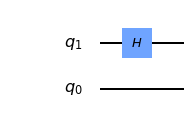

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(1)
qc.draw(output='mpl',reverse_bits=True)

In [2]:
from qiskit import execute, Aer

In [3]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=1, optimization_level=0)
unitary = job.result().get_unitary(qc, decimals=3)
for row in unitary:
    column = ' '
    for entry in row:
        column = column + str(entry.real) + ' '
    print(column)

 0.707 0.0 0.707 0.0 
 0.0 0.707 0.0 0.707 
 0.707 0.0 -0.707 0.0 
 0.0 0.707 0.0 -0.707 


which is equivalent to

$$
H \otimes I = 
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{pmatrix}
\otimes
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} & 0 \\
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} & 0 \\
0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} \\
\end{pmatrix}
$$

## Task 5

In [4]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# import randrange for random choices
from random import randrange

In [5]:
n = 5
m = 4
qubit_state = []

In [6]:
qreg = QuantumRegister(n)
creg = ClassicalRegister(n)
qc = QuantumCircuit(qreg, creg)

In [7]:
for i in range(n):
    qc.x(qreg[i])
    qubit_state.append(1)

In [8]:
for i in range(m):
    control = randrange(n)
    target = randrange(n)
    
    while control == target:
        target = randrange(n)
    
    print('The index for the control qubit =',control)
    print('The index for the target qubit =', target)
    print('------------------------------------')
    qc.cx(qreg[control],qreg[target])
    
    if qubit_state[control] == 1:
        qubit_state[target] = 1 - qubit_state[target]

The index for the control qubit = 1
The index for the target qubit = 0
------------------------------------
The index for the control qubit = 2
The index for the target qubit = 3
------------------------------------
The index for the control qubit = 0
The index for the target qubit = 4
------------------------------------
The index for the control qubit = 4
The index for the target qubit = 2
------------------------------------


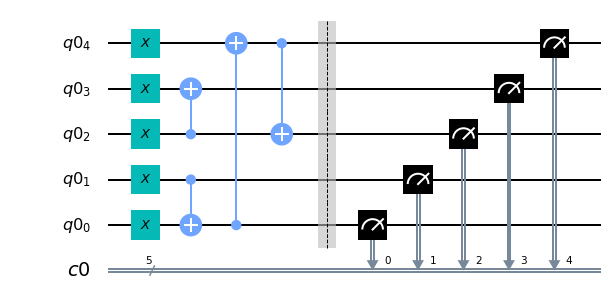

In [9]:
qc.barrier()
qc.measure(qreg, creg)
qc.draw('mpl', reverse_bits=True)

In [10]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=100)
counts = job.result().get_counts(qc)
print('The result of measurement is',counts)

The result of measurement is {'10010': 100}


## Task 6

In [11]:
qubits = ['00', '01', '10', '11']

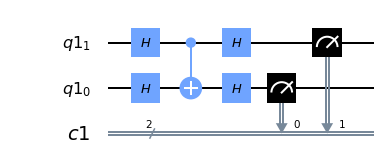

00 is mapped to {'00': 100}
------------------------------------------------------------------


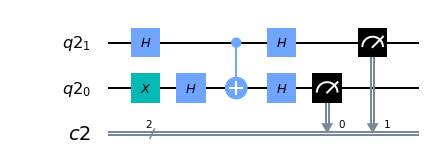

01 is mapped to {'11': 100}
------------------------------------------------------------------


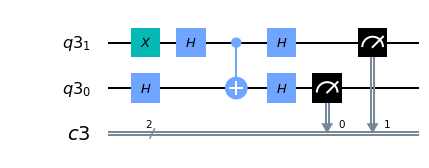

10 is mapped to {'10': 100}
------------------------------------------------------------------


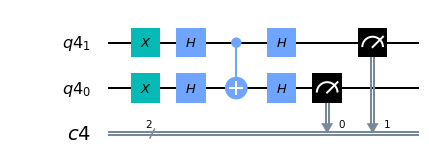

11 is mapped to {'01': 100}
------------------------------------------------------------------


In [12]:
for qubit in qubits:
    qreg = QuantumRegister(2)
    creg = ClassicalRegister(2)
    qc = QuantumCircuit(qreg,creg)

    
    if qubit[0] == '1':
        qc.x(qreg[1])
    if qubit[1] == '1':
        qc.x(qreg[0])
    
    qc.h(qreg[0])
    qc.h(qreg[1])
    qc.cx(qreg[1],qreg[0])
    qc.h(qreg[0])
    qc.h(qreg[1])
    
    qc.measure(qreg,creg)
    
    display(qc.draw('mpl', reverse_bits=True))
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=100)
    counts = job.result().get_counts(qc)
    print(qubit, 'is mapped to', counts)
    print('------------------------------------------------------------------')

## Task 7

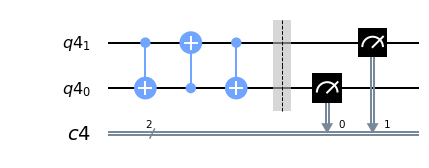

00 is mapped into {'00': 100}
-------------------------------------------------------------------


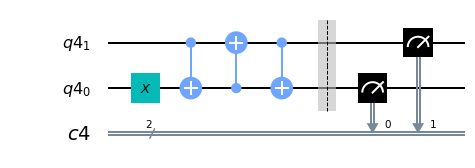

01 is mapped into {'10': 100}
-------------------------------------------------------------------


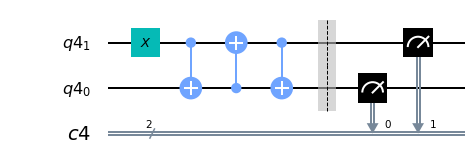

10 is mapped into {'01': 100}
-------------------------------------------------------------------


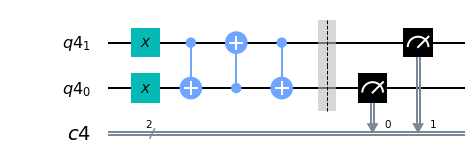

11 is mapped into {'11': 100}
-------------------------------------------------------------------


In [13]:
for qubit in qubits:
    qc = QuantumCircuit(qreg,creg)
    
    if qubit[0] == '1':
        qc.x(qreg[1])
    if qubit[1] == '1':
        qc.x(qreg[0])
    qc.cx(qreg[1], qreg[0])
    qc.cx(qreg[0], qreg[1])
    qc.cx(qreg[1], qreg[0])
    qc.barrier()
    qc.measure(qreg, creg)
    display(qc.draw('mpl', reverse_bits=True))
    
    job = execute(qc, backend, shots=100)
    counts = job.result().get_counts(qc)
    print(qubit,'is mapped into', counts)
    print('-------------------------------------------------------------------')

# Phase Kickback

In [14]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q,c)

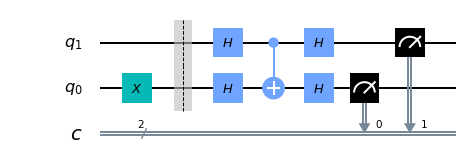

In [15]:
qc.x(q[0])
qc.barrier()
qc.h(q[0])
qc.h(q[1])
qc.cx(q[1],q[0])
qc.h(q[0])
qc.h(q[1])
qc.measure(q,c)
qc.draw('mpl', reverse_bits=True)

In [16]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=100)
counts = job.result().get_counts(qc)
print(counts)

{'11': 100}


## Task 2

In [17]:
q = QuantumRegister(7, 'q')
c = ClassicalRegister(7, 'c')
qc = QuantumCircuit(q,c)

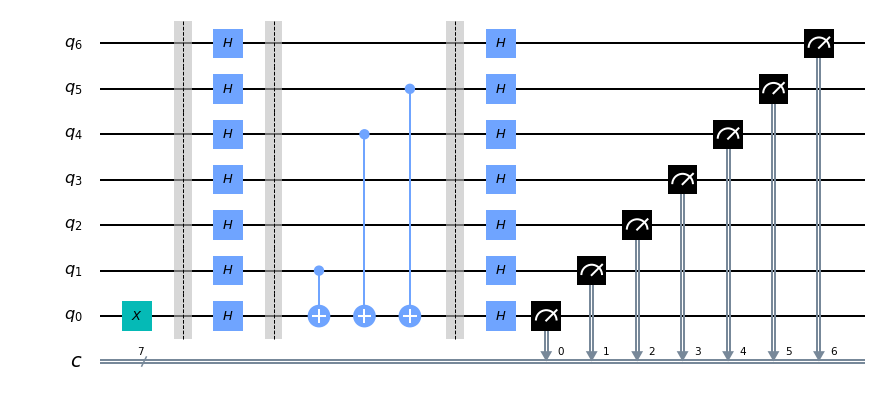

In [18]:
qc.x(q[0])
qc.barrier()

for i in range(7):
    qc.h(q[i])

qc.barrier()
qc.cx(q[1],q[0])
qc.cx(q[4],q[0])
qc.cx(q[5],q[0])

qc.barrier()

for i in range(7):
    qc.h(q[i])
    
qc.measure(q,c)
qc.draw('mpl', reverse_bits=True)

In [19]:
job = execute(qc, backend, shots=100)
counts = job.result().get_counts(qc)
print(counts)

{'0110011': 100}


# Entanglement and Superdense Coding

## Task 1

In [20]:
all_pairs = ['00','01','10','11']

In [21]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

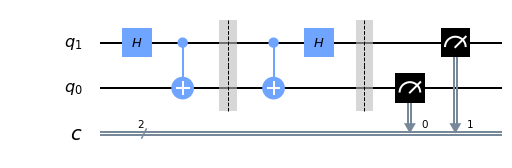

00 --> {'00': 100}
------------------------------------------------------------------


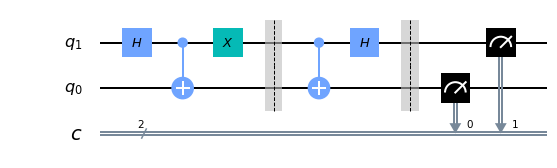

01 --> {'01': 100}
------------------------------------------------------------------


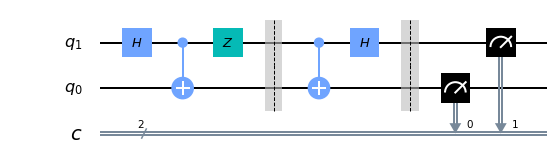

10 --> {'10': 100}
------------------------------------------------------------------


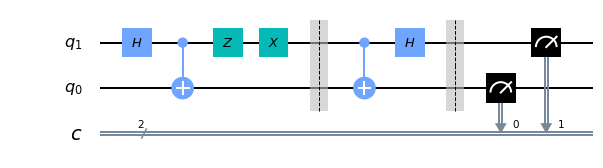

11 --> {'11': 100}
------------------------------------------------------------------


In [22]:
for pair in all_pairs:
    qc = QuantumCircuit(q,c)
    qc.h(q[1])
    qc.cx(q[1],q[0])
    
    if pair[0] == '1':
        qc.z(q[1])
        
    if pair[1] == '1':
        qc.x(q[1])
    
    qc.barrier()
    
    qc.cx(q[1], q[0])
    qc.h(q[1])
    
    qc.barrier()
    qc.measure(q,c)
    
    display(qc.draw('mpl', reverse_bits=True))
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=100)
    counts = job.result().get_counts(qc)
    print(pair, '-->', counts)
    print('------------------------------------------------------------------')

## Task 2

### Pair 00 

$$
|\psi_{in} \rangle = |00\rangle
$$

$$
|\psi_1\rangle = (H \otimes I) |\psi_{in} \rangle = H |0\rangle \otimes |0\rangle = \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle \\ = \frac{1}{\sqrt{2}} |00\rangle 
+ \frac{1}{\sqrt{2}} |10\rangle
$$

$$
|\psi_2\rangle = CX_{0,1} |\psi_1\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |00\rangle + \frac{1}{\sqrt{2}} CX_{0,1} |10\rangle = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

$$
|\psi_3\rangle = CX_{0,1} |\psi_2\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |00\rangle + \frac{1}{\sqrt{2}} CX_{0,1} |11\rangle = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |10\rangle
$$

$$
|\psi_{out}\rangle = (H \otimes I) |\psi_3\rangle = \frac{1}{\sqrt{2}} H |0\rangle \otimes |0\rangle + \frac{1}{\sqrt{2}} H |1\rangle \otimes |0\rangle = \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle + \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle \\ = 
\frac{1}{2} |00\rangle + \frac{1}{2} |10\rangle + \frac{1}{2} |00\rangle - \frac{1}{2} |10\rangle = |00\rangle
$$

### Pair 01

$$
|\psi_{in} \rangle = |\psi_{0} \rangle = |00\rangle
$$

$$
|\psi_1\rangle = (H \otimes I) |\psi_{in} \rangle = H |0\rangle \otimes |0\rangle = \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle \\ = \frac{1}{\sqrt{2}} |00\rangle 
+ \frac{1}{\sqrt{2}} |10\rangle
$$

$$
|\psi_2\rangle = CX_{0,1} |\psi_1\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |00\rangle + \frac{1}{\sqrt{2}} CX_{0,1} |10\rangle = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

$$
|\psi_3\rangle = (X \otimes I) |\psi_2\rangle = \frac{1}{\sqrt{2}} X |0\rangle \otimes |0\rangle + \frac{1}{\sqrt{2}} X |1\rangle \otimes |1\rangle \\ = \frac{1}{\sqrt{2}} |1\rangle \otimes |0\rangle + \frac{1}{\sqrt{2}} |0\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}} |10\rangle + \frac{1}{\sqrt{2}} |01\rangle 
$$

$$
|\psi_4\rangle = CX_{0,1} |\psi_3\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |10\rangle + \frac{1}{\sqrt{2}} CX_{0,1} |01\rangle = \frac{1}{\sqrt{2}} |01\rangle + \frac{1}{\sqrt{2}} |11\rangle 
$$

$$
|\psi_{out} \rangle = |\psi_5\rangle = (H \otimes I) |\psi_4\rangle = \frac{1}{\sqrt{2}} H |0\rangle \otimes |1\rangle + \frac{1}{\sqrt{2}} H |1\rangle \otimes |1\rangle \\ = \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |1\rangle + \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |1\rangle \\ = \frac{1}{2} |01\rangle + \frac{1}{2} |11\rangle + \frac{1}{2} |01\rangle - \frac{1}{2} |11\rangle = |01\rangle
$$

### Pair 10

$$
|\psi_{in} \rangle = |\psi_{0} \rangle = |00\rangle
$$

$$
|\psi_1\rangle = (H \otimes I) |\psi_{in} \rangle = H |0\rangle \otimes |0\rangle = \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle \\ = \frac{1}{\sqrt{2}} |00\rangle 
+ \frac{1}{\sqrt{2}} |10\rangle
$$

$$
|\psi_2\rangle = CX_{0,1} |\psi_1\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |00\rangle + \frac{1}{\sqrt{2}} CX_{0,1} |10\rangle = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

$$
|\psi_3\rangle = (Z \otimes I) |\psi_2\rangle = \frac{1}{\sqrt{2}} Z |0\rangle \otimes |0\rangle + \frac{1}{\sqrt{2}} Z |1\rangle \otimes |1\rangle \\ = \frac{1}{\sqrt{2}} |0\rangle \otimes |0\rangle - \frac{1}{\sqrt{2}} |1\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}} |00\rangle - \frac{1}{\sqrt{2}} |11\rangle 
$$

$$
|\psi_4\rangle = CX_{0,1} |\psi_3\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |00\rangle - \frac{1}{\sqrt{2}} CX_{0,1} |11\rangle = \frac{1}{\sqrt{2}} |00\rangle - \frac{1}{\sqrt{2}} |10\rangle 
$$

$$
|\psi_{out} \rangle = |\psi_5\rangle = (H \otimes I) |\psi_4\rangle = \frac{1}{\sqrt{2}} H |0\rangle \otimes |0\rangle - \frac{1}{\sqrt{2}} H |1\rangle \otimes |0\rangle \\ = \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle - \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle \\ = \frac{1}{2} |00\rangle + \frac{1}{2} |10\rangle - \frac{1}{2} |00\rangle + \frac{1}{2} |10\rangle = |10\rangle
$$

### Pair 11

$$
|\psi_{in} \rangle = |\psi_{0} \rangle = |00\rangle
$$

$$
|\psi_1\rangle = (H \otimes I) |\psi_{in} \rangle = H |0\rangle \otimes |0\rangle = \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle \\ = \frac{1}{\sqrt{2}} |00\rangle 
+ \frac{1}{\sqrt{2}} |10\rangle
$$

$$
|\psi_2\rangle = CX_{0,1} |\psi_1\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |00\rangle + \frac{1}{\sqrt{2}} CX_{0,1} |10\rangle = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

$$
|\psi_3\rangle = (Z \otimes I) |\psi_2\rangle = \frac{1}{\sqrt{2}} Z |0\rangle \otimes |0\rangle + \frac{1}{\sqrt{2}} Z |1\rangle \otimes |1\rangle \\ = \frac{1}{\sqrt{2}} |0\rangle \otimes |0\rangle - \frac{1}{\sqrt{2}} |1\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}} |00\rangle - \frac{1}{\sqrt{2}} |11\rangle 
$$

$$
|\psi_4\rangle = (X \otimes I) |\psi_3\rangle = \frac{1}{\sqrt{2}} X |0\rangle \otimes |0\rangle - \frac{1}{\sqrt{2}} X |1\rangle \otimes |1\rangle \\ = \frac{1}{\sqrt{2}} |1\rangle \otimes |0\rangle - \frac{1}{\sqrt{2}} |0\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}} |10\rangle - \frac{1}{\sqrt{2}} |01\rangle 
$$

$$
|\psi_5\rangle = CX_{0,1} |\psi_4\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |10\rangle - \frac{1}{\sqrt{2}} CX_{0,1} |01\rangle = \frac{1}{\sqrt{2}} |11\rangle - \frac{1}{\sqrt{2}} |01\rangle
$$

$$
|\psi_{out} \rangle = |\psi_6\rangle = (H \otimes I) |\psi_5\rangle = \frac{1}{\sqrt{2}} H |1\rangle \otimes |1\rangle - \frac{1}{\sqrt{2}} H |0\rangle \otimes |1\rangle \\ = \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |1\rangle - \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |1\rangle \\ = \frac{1}{2} |01\rangle - \frac{1}{2} |11\rangle - \frac{1}{2} |01\rangle - \frac{1}{2} |11\rangle = -|11\rangle
$$

## Task 3

In [23]:
all_pairs = ['00','01','10','11']

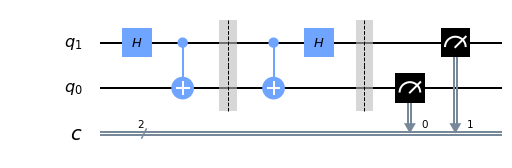

00 --> {'00': 100}


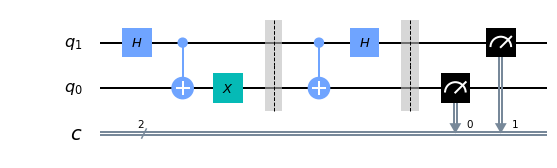

01 --> {'01': 100}


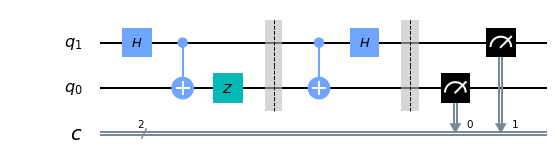

10 --> {'10': 100}


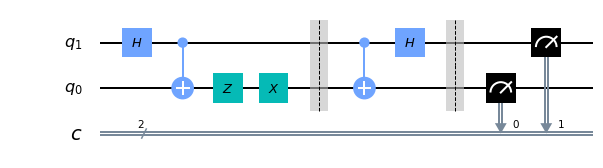

11 --> {'11': 100}


In [24]:
for pair in all_pairs:
    qc = QuantumCircuit(q,c)
    qc.h(q[1])
    qc.cx(q[1],q[0])
    
    if pair[0] == '1':
        qc.z(q[0])
        
    if pair[1] == '1':
        qc.x(q[0])
        
    qc.barrier()
    
    qc.cx(q[1], q[0])
    qc.h(q[1])
    
    qc.barrier()
    qc.measure(q,c)
    
    display(qc.draw('mpl', reverse_bits=True))
    
    job = execute(qc, backend, shots=100)
    counts = job.result().get_counts(qc)
    print(pair,'-->',counts)

## Task 4

### Pair 00

$$
|\psi_{in} \rangle =|\psi_0\rangle = |00\rangle
$$

$$
|\psi_1\rangle = (H \otimes I) |\psi_{0} \rangle = H |0\rangle \otimes |0\rangle = \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle \\ = \frac{1}{\sqrt{2}} |00\rangle 
+ \frac{1}{\sqrt{2}} |10\rangle
$$

$$
|\psi_2\rangle = CX_{0,1} |\psi_1\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |00\rangle + \frac{1}{\sqrt{2}} CX_{0,1} |10\rangle = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

$$
|\psi_3\rangle = CX_{0,1} |\psi_2\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |00\rangle + \frac{1}{\sqrt{2}} CX_{0,1} |11\rangle = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |10\rangle
$$

$$
|\psi_{out}\rangle = |\psi_4\rangle = (H \otimes I) |\psi_3\rangle = \frac{1}{\sqrt{2}} H |0\rangle \otimes |0\rangle + \frac{1}{\sqrt{2}} H |1\rangle \otimes |0\rangle = \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle + \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle \\ = 
\frac{1}{2} |00\rangle + \frac{1}{2} |10\rangle + \frac{1}{2} |00\rangle - \frac{1}{2} |10\rangle = |00\rangle
$$

### Pair 01

$$
|\psi_{in} \rangle =|\psi_0\rangle = |00\rangle
$$

$$
|\psi_1\rangle = (H \otimes I) |\psi_{0} \rangle = H |0\rangle \otimes |0\rangle = \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle \\ = \frac{1}{\sqrt{2}} |00\rangle 
+ \frac{1}{\sqrt{2}} |10\rangle
$$

$$
|\psi_2\rangle = CX_{0,1} |\psi_1\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |00\rangle + \frac{1}{\sqrt{2}} CX_{0,1} |10\rangle = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

$$
|\psi_3\rangle = (I \otimes X) |\psi_2\rangle = \frac{1}{\sqrt{2}} |0\rangle \otimes X|0\rangle + \frac{1}{\sqrt{2}} |1\rangle \otimes X |1\rangle \\ = \frac{1}{\sqrt{2}} |0\rangle \otimes |1\rangle + \frac{1}{\sqrt{2}} |1\rangle \otimes |0\rangle = \frac{1}{\sqrt{2}} |01\rangle + \frac{1}{\sqrt{2}} |10\rangle 
$$

$$
|\psi_4\rangle = CX_{0,1} |\psi_3\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |01\rangle + \frac{1}{\sqrt{2}} CX_{0,1} |10\rangle = \frac{1}{\sqrt{2}} |01\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

$$
|\psi_{out}\rangle = |\psi_5\rangle = (H \otimes I) |\psi_4\rangle = \frac{1}{\sqrt{2}} H |0\rangle \otimes |1\rangle + \frac{1}{\sqrt{2}} H |1\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |1\rangle + \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |1\rangle \\ = 
\frac{1}{2} |01\rangle + \frac{1}{2} |11\rangle + \frac{1}{2} |01\rangle - \frac{1}{2} |11\rangle = |01\rangle
$$

### Pair 10

$$
|\psi_{in} \rangle =|\psi_0\rangle = |00\rangle
$$

$$
|\psi_1\rangle = (H \otimes I) |\psi_{0} \rangle = H |0\rangle \otimes |0\rangle = \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle \\ = \frac{1}{\sqrt{2}} |00\rangle 
+ \frac{1}{\sqrt{2}} |10\rangle
$$

$$
|\psi_2\rangle = CX_{0,1} |\psi_1\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |00\rangle + \frac{1}{\sqrt{2}} CX_{0,1} |10\rangle = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

$$
|\psi_3\rangle = (I \otimes Z) |\psi_2\rangle = \frac{1}{\sqrt{2}} |0\rangle \otimes Z|0\rangle + \frac{1}{\sqrt{2}} |1\rangle \otimes Z |1\rangle \\ = \frac{1}{\sqrt{2}} |0\rangle \otimes |0\rangle - \frac{1}{\sqrt{2}} |1\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}} |00\rangle - \frac{1}{\sqrt{2}} |11\rangle 
$$

$$
|\psi_4\rangle = CX_{0,1} |\psi_3\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |00\rangle - \frac{1}{\sqrt{2}} CX_{0,1} |11\rangle = \frac{1}{\sqrt{2}} |00\rangle - \frac{1}{\sqrt{2}} |10\rangle
$$

$$
|\psi_{out}\rangle = |\psi_5\rangle = (H \otimes I) |\psi_4\rangle = \frac{1}{\sqrt{2}} H |0\rangle \otimes |0\rangle - \frac{1}{\sqrt{2}} H |1\rangle \otimes |0\rangle = \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle - \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle \\ = 
\frac{1}{2} |00\rangle + \frac{1}{2} |10\rangle - \frac{1}{2} |00\rangle - \frac{1}{2} |10\rangle = |10\rangle
$$

### Pair 11

$$
|\psi_{in} \rangle =|\psi_0\rangle = |00\rangle
$$

$$
|\psi_1\rangle = (H \otimes I) |\psi_{0} \rangle = H |0\rangle \otimes |0\rangle = \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |0\rangle \\ = \frac{1}{\sqrt{2}} |00\rangle 
+ \frac{1}{\sqrt{2}} |10\rangle
$$

$$
|\psi_2\rangle = CX_{0,1} |\psi_1\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |00\rangle + \frac{1}{\sqrt{2}} CX_{0,1} |10\rangle = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

$$
|\psi_3\rangle = (I \otimes Z) |\psi_2\rangle = \frac{1}{\sqrt{2}} |0\rangle \otimes Z|0\rangle + \frac{1}{\sqrt{2}} |1\rangle \otimes Z |1\rangle \\ = \frac{1}{\sqrt{2}} |0\rangle \otimes |0\rangle - \frac{1}{\sqrt{2}} |1\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}} |00\rangle - \frac{1}{\sqrt{2}} |11\rangle 
$$

$$
|\psi_4\rangle = (I \otimes X) |\psi_3\rangle = \frac{1}{\sqrt{2}} |0\rangle \otimes X|0\rangle - \frac{1}{\sqrt{2}} |1\rangle \otimes X|1\rangle \\ = \frac{1}{\sqrt{2}} |0\rangle \otimes |1\rangle - \frac{1}{\sqrt{2}} |1\rangle \otimes |0\rangle = \frac{1}{\sqrt{2}} |01\rangle - \frac{1}{\sqrt{2}} |10\rangle 
$$

$$
|\psi_5\rangle = CX_{0,1} |\psi_4\rangle = \frac{1}{\sqrt{2}} CX_{0,1} |01\rangle - \frac{1}{\sqrt{2}} CX_{0,1} |10\rangle = \frac{1}{\sqrt{2}} |01\rangle - \frac{1}{\sqrt{2}} |11\rangle
$$

$$
|\psi_{out}\rangle = |\psi_6\rangle = (H \otimes I) |\psi_5\rangle = \frac{1}{\sqrt{2}} H |0\rangle \otimes |0\rangle - \frac{1}{\sqrt{2}} H |1\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |1\rangle - \frac{1}{\sqrt{2}} \left ( \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle \right) \otimes |1\rangle \\ = 
\frac{1}{2} |01\rangle + \frac{1}{2} |11\rangle - \frac{1}{2} |01\rangle + \frac{1}{2} |11\rangle = |11\rangle
$$

# Quantum Teleportation

## Task 1

The state before applying a CNOT gate

$$
|\psi_{before}\rangle = \frac{1}{\sqrt{2}} \left( a|000\rangle + a|011\rangle + b|100\rangle + b|111\rangle \right)
$$

The state after applying a CNOT gate

$$
|\psi_{after}\rangle = CX_{0,1} |\psi_{before}\rangle \\ = \frac{1}{\sqrt{2}} \left( a \, CX_{0,1}|000\rangle + a \, CX_{0,1}|011\rangle + b \, CX_{0,1}|100\rangle + b \, CX_{0,1}|111\rangle \right) = \frac{1}{\sqrt{2}} \left( a|000\rangle + a|011\rangle + b|110\rangle + b|101\rangle \right)
$$

where we follow the **textbook** qubit ordering.

## Task 2

The state before applying a Hadmard gate

$$
|\psi_{before}\rangle = \frac{1}{\sqrt{2}} \left(a|000\rangle + a|011\rangle + b|110\rangle + b|101\rangle \right)
$$

The state after applying a Hadamard gate

$$
|\psi_{after}\rangle = (H \otimes I \otimes I) |\psi_{before}\rangle \\ = \frac{a}{\sqrt{2}} H |0\rangle \otimes |00\rangle + \frac{a}{\sqrt{2}} H |0\rangle \otimes |11\rangle + \frac{b}{\sqrt{2}} H |1\rangle \otimes |10\rangle + \frac{b}{\sqrt{2}} H |1\rangle \otimes |01\rangle = \frac{a}{\sqrt{2}}\left(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle \right) \otimes |00\rangle + \frac{a}{\sqrt{2}}\left(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle \right) \otimes |11\rangle + \frac{b}{\sqrt{2}}\left(\frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle \right) \otimes |10\rangle + \frac{b}{\sqrt{2}}\left(\frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle \right) \otimes |01\rangle \\ = \frac{a}{2} |000\rangle + \frac{a}{2} |100\rangle + \frac{a}{2} |011\rangle + \frac{a}{2} |111\rangle + \frac{b}{2} |010\rangle - \frac{b}{2} |110\rangle + \frac{b}{2} |001\rangle - \frac{b}{2} |101\rangle = \frac{1}{2} \left ( a|000\rangle + b|001\rangle + b|010\rangle + a|011\rangle + a|100\rangle - b|101\rangle - b|110\rangle + a|111\rangle\right)
$$

## Task 3

### Measurement outcome "00"

The state of Balvis qubit

$$
|\psi_{00}\rangle = a|0\rangle + b|1\rangle
$$

Balvis does not need to apply an extra operation on his qubit.

### Measurement outcome "01"

The state of Balvis qubit

$$
|\psi\rangle = b|0\rangle + a|1\rangle
$$

If Balvis applies an X gate, the state becomes

$$
|\psi_{01}\rangle = X|\psi\rangle = b \, X|1\rangle + a \, X|0\rangle = a|0\rangle +b|1\rangle
$$

### Measurement outcome "10"

The state of Balvis qubit

$$
|\psi\rangle = a|0\rangle - b|1\rangle
$$

If Balvis applies a Z gate, the state becomes

$$
|\psi_{10}\rangle = Z|\psi\rangle = a \, Z|0\rangle - b \, Z|1\rangle = a|0\rangle +b|1\rangle
$$

### Measurement outcome "11"

The state of Balvis qubit

$$
|\psi_0\rangle = a|1\rangle - b|0\rangle
$$

If Balvis applies an X gate followed by a Z gate, the state becomes

$$
|\psi_1\rangle = X |\psi_0\rangle = a \, X|1\rangle - b \, X|0\rangle = a|0\rangle - b|1\rangle
$$

$$
|\psi_{11}\rangle = Z|\psi_1\rangle = a \, Z|0\rangle - b \, Z|1\rangle = a|0\rangle +b|1\rangle
$$

## Task 4 

In [25]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q,c)

In [26]:
import numpy as np
rand_angle = randrange(360)
theta = 2*np.pi*rand_angle/360
print('The chossen angle is',rand_angle,'deg or', round(theta,3),'rad')

The chossen angle is 65 deg or 1.134 rad


In [27]:
a = np.cos(theta)
b = np.sin(theta)
print('The state amplitudes:')
print("a =", round(a,3))
print('b =', round(b,3))

The state amplitudes:
a = 0.423
b = 0.906


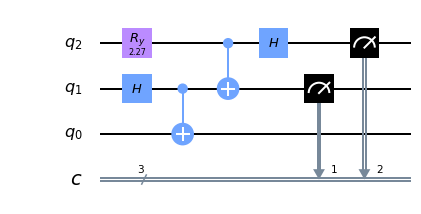

In [28]:
qc.ry(2*theta, q[2])
qc.h(q[1])
qc.cx(q[1], q[0])
qc.cx(q[2], q[1])
qc.h(q[2])
qc.measure(q[2],c[2])
qc.measure(q[1],c[1])
qc.draw('mpl', reverse_bits=True)

In [29]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend, shots=1, optimization_level=0)
state = job.result().get_statevector(qc)
print('The state vector components are')
for i in range(len(state)):
    print(state[i].real)

The state vector components are
0.4226182617406994
0.9063077870366498
0.0
0.0
0.0
0.0
0.0
0.0


In [30]:
bits = ['00', '01', '10', '11']

In [31]:
for i in range(4):
    if (state[2*i].real != 0) or (state[2*i+1].real != 0):
        print('The classical outcome is', bits[i])
        bit = bits[i]
        balvis_state = [state[2*i].real, state[2*i+1].real]

The classical outcome is 00


In [32]:
quantum_state = '|'+bit+'>'
quantum_state += '(' + str(round(balvis_state[0],3)) + '|0> +' + str(round(balvis_state[1],3)) + '|1>)'
print('The new quantum state is', quantum_state)

The new quantum state is |00>(0.423|0> +0.906|1>)


In [33]:
all_bits = ['000', '001', '010', '011', '100', '101', '110', '111']

In [34]:
state_type = '|'+bit+'>('

In [35]:
for i in range(len(state)):
    if abs(state[i].real-a) < 0.000001:
        state_type += '+a|'+ all_bits[i][2] + '>'
    elif abs(state[i].real+a) < 0.000001:
        state_type += '-a|'+ all_bits[i][2] + '>'
    elif abs(state[i].real-b) < 0.000001:
        state_type += '+b|'+ all_bits[i][2] + '>'
    elif abs(state[i].real+b) < 0.000001:
        state_type += '-b|'+ all_bits[i][2] + '>'
state_type += ')'
print('The quantum state is of type:', state_type)

The quantum state is of type: |00>(+a|0>+b|1>)


## Task 5

In [36]:
q = QuantumRegister(3, 'q')
c1 = ClassicalRegister(1, 'c1')
c2 = ClassicalRegister(1, 'c2')
qc = QuantumCircuit(q,c1,c2)

In [37]:
rand_angle = randrange(360)
theta = 2*np.pi*rand_angle/360
print('The chossen angle is',rand_angle,'deg or', round(theta,3),'rad')

The chossen angle is 150 deg or 2.618 rad


In [38]:
a = np.cos(theta)
b = np.sin(theta)
print('The state amplitudes:')
print("a =", round(a,3))
print('b =', round(b,3))

The state amplitudes:
a = -0.866
b = 0.5


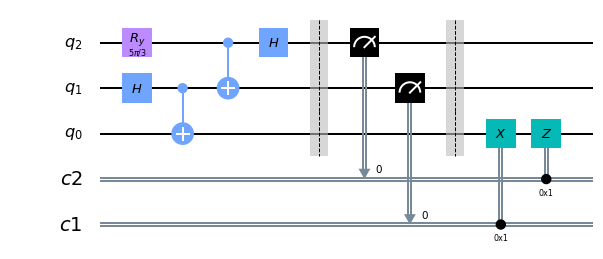

In [39]:
qc.ry(2*theta, q[2])
qc.h(q[1])
qc.cx(q[1], q[0])
qc.cx(q[2], q[1])
qc.h(q[2])
qc.barrier()
qc.measure(q[2], c2)
qc.measure(q[1], c1)
qc.barrier()
qc.x(q[0]).c_if(c1, 1)
qc.z(q[0]).c_if(c2, 1)
qc.draw('mpl', reverse_bits=True)

In [40]:
job = execute(qc, backend, shots=1, optimization_level=0)
state = job.result().get_statevector(qc)
print('The statevector:')
for i in range(len(state)):
    print(round(state[i].real,4))

The statevector:
0.0
0.0
0.0
0.0
-0.866
0.5
0.0
0.0


In [41]:
for i in range(len(bits)):
    if (state[2*i].real != 0) or (state[2*i+1].real != 0):
        print('The classical outcome:', bits[i])

The classical outcome: 10


# Multiple Control Constructions

## Task 1

#### $ C_0C_0X $ Gate

In [42]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q,c)

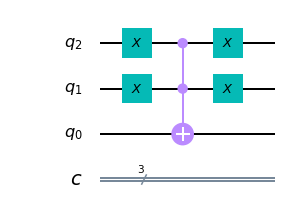

In [43]:
qc.x(q[2])
qc.x(q[1])
qc.ccx(q[2], q[1], q[0])
qc.x(q[2])
qc.x(q[1])
qc.draw('mpl', reverse_bits=True)

In [44]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=1)
unitary = job.result().get_unitary(qc, decimals=3)

In [45]:
print("CCNOT(00) = ")
print()
for row in unitary:
    s = ''
    for value in row:
        s = s + str(round(value.real, 2)) + ' '
    print(s)

CCNOT(00) = 

0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 


### $ C_0C_1NOT $ Gate

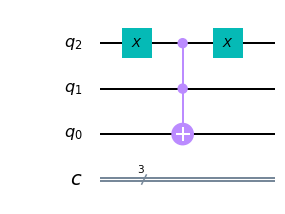

In [46]:
qc = QuantumCircuit(q,c)
qc.x(q[2])
qc.ccx(q[2], q[1], q[0])
qc.x(q[2])
qc.draw('mpl', reverse_bits=True)

In [47]:
job = execute(qc, backend, shots=1)
unitary = job.result().get_unitary(qc)

In [48]:
print("CCNOT(01) = ")
print()
for row in unitary:
    s = ''
    for value in row:
        s = s + str(round(value.real, 2)) + ' '
    print(s)

CCNOT(01) = 

1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 
0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 


### $ C_1C_0X $ Gate

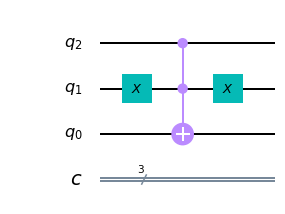

In [49]:
qc = QuantumCircuit(q,c)
qc.x(q[1])
qc.ccx(q[2], q[1], q[0])
qc.x(q[1])
qc.draw('mpl', reverse_bits=True)

In [50]:
job = execute(qc, backend, shots=1)
unitary = job.result().get_unitary(qc)

In [51]:
print("CCNOT(10) = ")
print()
for row in unitary:
    s = ''
    for value in row:
        s = s + str(round(value.real, 2)) + ' '
    print(s)

CCNOT(10) = 

1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 
0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 


## Task 2

In [52]:
qaux = QuantumRegister(2, 'qaux')
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')
qc = QuantumCircuit(q, qaux, c)

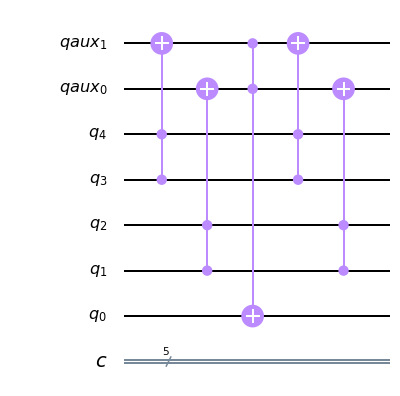

In [53]:
qc.ccx(q[4], q[3], qaux[1])
qc.ccx(q[2], q[1], qaux[0])
qc.ccx(qaux[1], qaux[0], q[0])
qc.ccx(q[4], q[3], qaux[1])
qc.ccx(q[2], q[1], qaux[0])
qc.draw('mpl', reverse_bits=True)

In [54]:
inputs = []
for q4 in ['0', '1']:
    for q3 in ['0', '1']:
        for q2 in ['0', '1']:
            for q1 in ['0', '1']:
                for q0 in ['0', '1']:
                        inputs.append(q4 + q3 + q2 + q1 + q0)
print(inputs)

['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']


In [55]:
print('input ---> output')
for input in inputs:
    qaux = QuantumRegister(2, 'qaux')
    q = QuantumRegister(5, 'q')
    c = ClassicalRegister(5, 'c')
    qc = QuantumCircuit(q, qaux, c)
    
    if input[0] == '1':
        qc.x(q[4])
    if input[1] == '1':
        qc.x(q[3])
    if input[2] == '1':
        qc.x(q[2])
    if input[3] == '1':
        qc.x(q[1])
    if input[4] == '1':
        qc.x(q[0])
    
    qc.ccx(q[4], q[3], qaux[1])
    qc.ccx(q[2], q[1], qaux[0])
    qc.ccx(qaux[1], qaux[0], q[0])
    qc.ccx(q[4], q[3], qaux[1])
    qc.ccx(q[2], q[1], qaux[0])
    
    qc.measure(q,c)
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1)
    counts = job.result().get_counts(qc)
    
    for key in counts:
        output = key
        string = input[0:4] + ' ' + input[4] + ' ---> ' + output[0:4] + ' ' + output[4]
        if (input != output):
            string = string + ' (The output is different than the input)'
        print(string)

input ---> output
0000 0 ---> 0000 0
0000 1 ---> 0000 1
0001 0 ---> 0001 0
0001 1 ---> 0001 1
0010 0 ---> 0010 0
0010 1 ---> 0010 1
0011 0 ---> 0011 0
0011 1 ---> 0011 1
0100 0 ---> 0100 0
0100 1 ---> 0100 1
0101 0 ---> 0101 0
0101 1 ---> 0101 1
0110 0 ---> 0110 0
0110 1 ---> 0110 1
0111 0 ---> 0111 0
0111 1 ---> 0111 1
1000 0 ---> 1000 0
1000 1 ---> 1000 1
1001 0 ---> 1001 0
1001 1 ---> 1001 1
1010 0 ---> 1010 0
1010 1 ---> 1010 1
1011 0 ---> 1011 0
1011 1 ---> 1011 1
1100 0 ---> 1100 0
1100 1 ---> 1100 1
1101 0 ---> 1101 0
1101 1 ---> 1101 1
1110 0 ---> 1110 0
1110 1 ---> 1110 1
1111 0 ---> 1111 1 (The output is different than the input)
1111 1 ---> 1111 0 (The output is different than the input)


### Task 3

In [56]:
qaux = QuantumRegister(2, 'qaux')
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')
qc = QuantumCircuit(q, qaux, c)

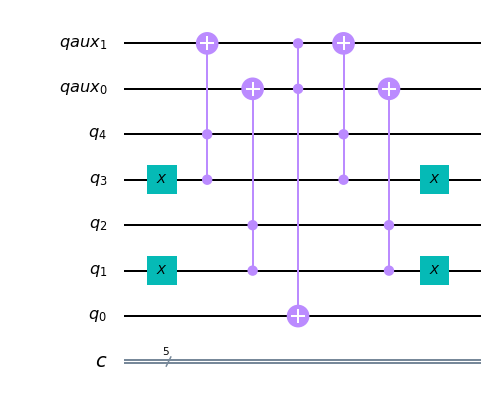

In [57]:
qc.x(q[3])
qc.x(q[1])
qc.ccx(q[4], q[3], qaux[1])
qc.ccx(q[2], q[1], qaux[0])
qc.ccx(qaux[1], qaux[0], q[0])
qc.ccx(q[4], q[3], qaux[1])
qc.ccx(q[2], q[1], qaux[0])
qc.x(q[3])
qc.x(q[1])
qc.draw('mpl', reverse_bits=True)

In [58]:
print('input ---> output')
for input in inputs:
    qaux = QuantumRegister(2, 'qaux')
    q = QuantumRegister(5, 'q')
    c = ClassicalRegister(5, 'c')
    qc = QuantumCircuit(q, qaux, c)
    
    if input[0] == '1':
        qc.x(q[4])
    if input[1] == '1':
        qc.x(q[3])
    if input[2] == '1':
        qc.x(q[2])
    if input[3] == '1':
        qc.x(q[1])
    if input[4] == '1':
        qc.x(q[0])
    
    qc.x(q[3])
    qc.x(q[1])
    qc.ccx(q[4], q[3], qaux[1])
    qc.ccx(q[2], q[1], qaux[0])
    qc.ccx(qaux[1], qaux[0], q[0])
    qc.ccx(q[4], q[3], qaux[1])
    qc.ccx(q[2], q[1], qaux[0])
    qc.x(q[3])
    qc.x(q[1])
    
    qc.measure(q,c)
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1)
    counts = job.result().get_counts(qc)
    
    for key in counts:
        output = key
        string = input[0:4] + ' ' + input[4] + ' ---> ' + output[0:4] + ' ' + output[4]
        if (input != output):
            string = string + ' (The output is different than the input)'
        print(string)

input ---> output
0000 0 ---> 0000 0
0000 1 ---> 0000 1
0001 0 ---> 0001 0
0001 1 ---> 0001 1
0010 0 ---> 0010 0
0010 1 ---> 0010 1
0011 0 ---> 0011 0
0011 1 ---> 0011 1
0100 0 ---> 0100 0
0100 1 ---> 0100 1
0101 0 ---> 0101 0
0101 1 ---> 0101 1
0110 0 ---> 0110 0
0110 1 ---> 0110 1
0111 0 ---> 0111 0
0111 1 ---> 0111 1
1000 0 ---> 1000 0
1000 1 ---> 1000 1
1001 0 ---> 1001 0
1001 1 ---> 1001 1
1010 0 ---> 1010 1 (The output is different than the input)
1010 1 ---> 1010 0 (The output is different than the input)
1011 0 ---> 1011 0
1011 1 ---> 1011 1
1100 0 ---> 1100 0
1100 1 ---> 1100 1
1101 0 ---> 1101 0
1101 1 ---> 1101 1
1110 0 ---> 1110 0
1110 1 ---> 1110 1
1111 0 ---> 1111 0
1111 1 ---> 1111 1
